les importations necessaire

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
data_path = r'C:\Users\azizh\OneDrive\Bureau\TekSpire\Data\DataFix\DataExpand\FinaleUncleanDataset.csv'
data = pd.read_csv(data_path)

data.head()

,id,name,sku,description,price,special_price,erpstock_label,manufacturer_label,Processeur,Système d'exploitation,Mémoire RAM,Disque Dur,Carte mère,Carte Graphique,Dimensions,Garantie,Couleur
0,63764,PC de Bureau ALL IN ONE LENOVO A100 Intel N100...,F0J6005PFG,"Écran 23.8"" Full HD, IPS - Processeur: Intel® ...",1099,NaN,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR4,256Go SSD,NaN,Intel UHD Graphics avec Wi,NaN,1 an + Clavier & Souris Retrait en Magasin ou ...,Gris nuage
1,69414,PC de Bureau ALL IN ONE LENOVO A100 Intel N100...,F0J6005PFG-W11P,"Écran 23.8"" Full HD, IPS - Processeur: Intel® ...",1159,NaN,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",Windows 11 Pro,8 Go DDR4,256Go SSD,NaN,Intel UHD Graphics avec Wi,NaN,1 an + Clavier & Souris Retrait en Magasin ou ...,Gris nuage
2,64093,PC de Bureau ALL IN ONE LENOVO V100 Intel N100...,13BE000HFM,"Écran 23.8"" Full HD, IPS - Processeur: Intel® ...",1199,NaN,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR4,512Go SSD,NaN,Intel UHD Graphics avec Wi,NaN,2 ans + Clavier & Souris Retrait en Magasin ou...,Noir
3,67584,PC de Bureau ALL IN ONE HP 22-dg0008nk Intel N...,A2AS8EA,"PC tout en un HP 22-dg0008nk - Écran 21.45"" Fu...",1329,NaN,En stock,HP,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR5,256 Go SSD,NaN,Intel UHD Graphics avec Wi,NaN,1 an + Clavier & Souris Retrait en Magasin ou ...,Blanc
4,64098,PC de Bureau ALL IN ONE LENOVO V100 Intel N100...,13BE000HFM-16G,"Écran 23.8"" Full HD, IPS - Processeur: Intel® ...",1349,NaN,En arrivage,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,16 Go DDR4,512Go SSD,NaN,Intel UHD Graphics avec Wi,NaN,2 ans + Clavier & Souris Retrait en Magasin ou...,Noir


In [47]:
data.shape

(684, 17)

In [48]:
data.describe()

,id,price,special_price
count,684.000000,684.000000,52.000000
mean,63718.261696,2607.868421,2997.923077
std,4811.407583,1188.121615,1437.284229
min,34500.000000,465.000000,849.000000
25%,60801.250000,1769.000000,1989.000000
50%,64685.000000,2479.000000,2549.000000
75%,67544.000000,3099.000000,4619.000000
max,69711.000000,8759.000000,6119.000000


In [49]:
data.columns.tolist()

['id',
 'name',
 'sku',
 'description',
 'price',
 'special_price',
 'erpstock_label',
 'manufacturer_label',
 'Processeur',
 "Système d'exploitation",
 'Mémoire RAM',
 'Disque Dur',
 'Carte mère',
 'Carte Graphique',
 'Dimensions',
 'Garantie',
 'Couleur']

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      684 non-null    int64  
 1   name                    684 non-null    object 
 2   sku                     684 non-null    object 
 3   description             684 non-null    object 
 4   price                   684 non-null    int64  
 5   special_price           52 non-null     float64
 6   erpstock_label          684 non-null    object 
 7   manufacturer_label      684 non-null    object 
 8   Processeur              684 non-null    object 
 9   Système d'exploitation  645 non-null    object 
 10  Mémoire RAM             644 non-null    object 
 11  Disque Dur              684 non-null    object 
 12  Carte mère              235 non-null    object 
 13  Carte Graphique         684 non-null    object 
 14  Dimensions              135 non-null    ob

In [51]:
print(f'données nulle par colonne \n{data.isnull().sum()}')

print(f'\ndonnées nulle sur tous le dataset \n{data.isnull().sum().sum()}')

données nulle par colonne 
id                          0
name                        0
sku                         0
description                 0
price                       0
special_price             632
erpstock_label              0
manufacturer_label          0
Processeur                  0
Système d'exploitation     39
Mémoire RAM                40
Disque Dur                  0
Carte mère                449
Carte Graphique             0
Dimensions                549
Garantie                    0
Couleur                     3
dtype: int64

données nulle sur tous le dataset 
1712


In [52]:
data.drop(columns=['sku','special_price','Carte mère', 'Dimensions'], inplace=True)

In [53]:
data.columns.tolist()


['id',
 'name',
 'description',
 'price',
 'erpstock_label',
 'manufacturer_label',
 'Processeur',
 "Système d'exploitation",
 'Mémoire RAM',
 'Disque Dur',
 'Carte Graphique',
 'Garantie',
 'Couleur']

In [54]:
data.shape

(684, 13)

Nettoyage des Données

In [55]:
data.isnull() 

,id,name,description,price,erpstock_label,manufacturer_label,Processeur,Système d'exploitation,Mémoire RAM,Disque Dur,Carte Graphique,Garantie,Couleur
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,False,False,False,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False,False,False,False
682,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
import pandas as pd

data['Couleur'] = data['Couleur'].fillna(data['Couleur'].mode()[0])
data['Système d\'exploitation'] = data['Système d\'exploitation'].fillna(data['Système d\'exploitation'].mode()[0])
data['Mémoire RAM'] = data['Mémoire RAM'].fillna(data['Mémoire RAM'].mode()[0])

In [57]:
print(f'données nulle par colonne \n{data.isnull().sum()}')

print(f'\ndonnées nulle sur tous le dataset \n{data.isnull().sum().sum()}')

données nulle par colonne 
id                        0
name                      0
description               0
price                     0
erpstock_label            0
manufacturer_label        0
Processeur                0
Système d'exploitation    0
Mémoire RAM               0
Disque Dur                0
Carte Graphique           0
Garantie                  0
Couleur                   0
dtype: int64

données nulle sur tous le dataset 
0


In [ ]:
data =data.drop(columns=['description','id'])


In [62]:
data.columns.tolist()

['name',
 'price',
 'erpstock_label',
 'manufacturer_label',
 'Processeur',
 "Système d'exploitation",
 'Mémoire RAM',
 'Disque Dur',
 'Carte Graphique',
 'Garantie',
 'Couleur']

In [69]:
data.head()

,name,price,erpstock_label,manufacturer_label,Processeur,Système d'exploitation,Mémoire RAM,Disque Dur,Carte Graphique,Garantie,Couleur
0,PC de Bureau ALL IN ONE LENOVO A100 Intel N100...,1099,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR4,256Go SSD,Intel UHD Graphics avec Wi,1 an + Clavier & Souris Retrait en Magasin ou ...,Gris nuage
1,PC de Bureau ALL IN ONE LENOVO A100 Intel N100...,1159,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",Windows 11 Pro,8 Go DDR4,256Go SSD,Intel UHD Graphics avec Wi,1 an + Clavier & Souris Retrait en Magasin ou ...,Gris nuage
2,PC de Bureau ALL IN ONE LENOVO V100 Intel N100...,1199,En stock,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR4,512Go SSD,Intel UHD Graphics avec Wi,2 ans + Clavier & Souris Retrait en Magasin ou...,Noir
3,PC de Bureau ALL IN ONE HP 22-dg0008nk Intel N...,1329,En stock,HP,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,8 Go DDR5,256 Go SSD,Intel UHD Graphics avec Wi,1 an + Clavier & Souris Retrait en Magasin ou ...,Blanc
4,PC de Bureau ALL IN ONE LENOVO V100 Intel N100...,1349,En arrivage,LENOVO,"Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo d...",FreeDos,16 Go DDR4,512Go SSD,Intel UHD Graphics avec Wi,2 ans + Clavier & Souris Retrait en Magasin ou...,Noir


In [219]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import pandas as pd


In [221]:
num_cols = ['price']
cat_cols = [
    'Processeur',
    'Mémoire RAM',
    'Disque Dur',
    'Carte Graphique'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [222]:
X_transformed = preprocessor.fit_transform(data[num_cols + cat_cols])

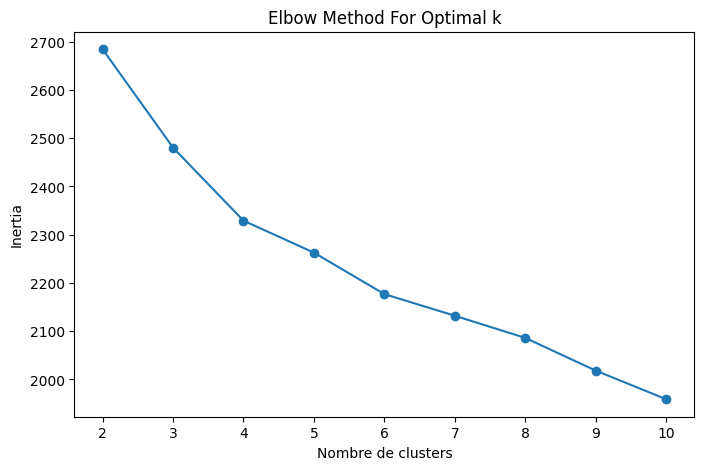

In [269]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.show()

In [270]:
kmeans = KMeans(n_clusters=6, random_state=42)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('kmeans', kmeans)
])

# Entraînement
pipeline.fit(data[num_cols + cat_cols])

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('kmeans', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [271]:
clusters = pipeline.named_steps['kmeans'].labels_  # Les clusters après fit
centroids = kmeans.cluster_centers_

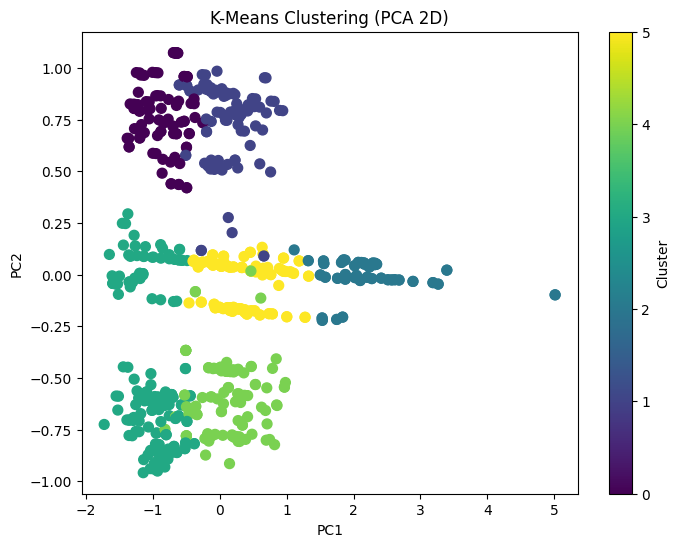

In [272]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire X_processed à 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_transformed)

# Visualiser
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


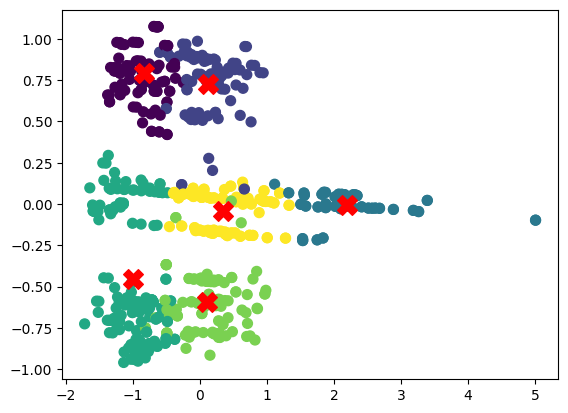

In [273]:
centroids_2d = pca.transform(kmeans.cluster_centers_)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200)
plt.show()


In [266]:
def recommend(product_index, n=5):
    cluster_id = data.loc[product_index, 'cluster']
    return data[data['cluster'] == cluster_id].sample(n)

# Exemple Cela renvoie 5 produits du même cluster → reco simple mais efficace.
recommend(10, n=5)


,name,price,erpstock_label,manufacturer_label,Processeur,Système d'exploitation,Mémoire RAM,Disque Dur,Carte Graphique,Garantie,Couleur,cluster
449,PC Portable Gamer MSI Cyborg 15 A13VE i7 13è G...,3629,En stock,MSI,Intel Core i7,FreeDos,32 Go DDR5,512Go SSD,NVIDIA GeForce RTX 4050 ( 6 Go de mémoire dédi...,1 an Retrait en Magasin ou Livraison Gratuite *,Noir,1
433,PC Portable Gamer LENOVO LOQ 15AHP10 AMD Ryzen...,3319,En stock,LENOVO,AMD Ryzen 5 220 ( 3.2 GHz up to 4.9 GHz Turbo ...,FreeDos,16Go DDR5,512Go SSD,NVIDIA GeForce RTX 5050 ( 8Go de mémoire dédié...,2 ans Retrait en Magasin ou Livraison Gratuite *,Gris Luna,1
18,PC de Bureau All In One HP AI 27-cr2015nk Ultr...,3549,En stock,HP,"Intel Core Ultra 7 255U (Up to 5,2 GHz Turbo m...",Windows 11 Famille,16 Go DDR5,1 To SSD,Intel UHD Graphics avec Wi,1 an + Clavier & Souris Retrait en Magasin ou ...,Noir,1
434,PC Portable Gamer MSI Cyborg 15 A13VE i7 13è G...,3419,En stock,MSI,Intel Core i7,FreeDos,16 Go DDR5,512Go SSD,NVIDIA GeForce RTX 4050 ( 6 Go de mémoire dédi...,1 an Retrait en Magasin ou Livraison Gratuite *,Noir,1
437,PC Portable Gamer MSI Cyborg 15 A13VE i7 13è G...,3389,En stock,MSI,Intel Core i7,Windows 11 Pro,16 Go DDR5,512Go SSD,NVIDIA GeForce RTX 4050 ( 6 Go de mémoire dédi...,1 an Retrait en Magasin ou Livraison Gratuite *,Noir,1


In [275]:
joblib.dump(pipeline, "kmeans_pc_pipeline.pkl")
print("Modèle sauvegardé sous 'kmeans_pc_pipeline.pkl'")


Modèle sauvegardé sous 'kmeans_pc_pipeline.pkl'


In [283]:
import pandas as pd
import joblib

# ===========================
# 1️⃣ Charger le dataset
# ===========================
data = pd.read_csv(r"C:\Users\azizh\OneDrive\Bureau\TekSpire\Data\DataFix\DataExpand\FinaleUncleanDataset.csv")

# ===========================
# 2️⃣ Charger le modèle sauvegardé
# ===========================
pipeline = joblib.load("kmeans_pc_pipeline.pkl")

# ===========================
# 3️⃣ Nouveau PC à tester
# ===========================
new_pc = pd.DataFrame([{
    'price': 1300,
    'Processeur': 'Intel® N100 ',
    'Mémoire RAM': '16 Go DDR4',
    'Disque Dur': '512Go SSD',
    'Carte Graphique': 'Intel UHD Graphics'
}])

# ===========================
# 4️⃣ Prédire le cluster
# ===========================
cluster = pipeline.predict(new_pc)[0]
print("Cluster du nouveau PC :", cluster)

# ===========================
# 5️⃣ Ajouter les clusters au dataset
# ===========================
num_cols = ['price']
cat_cols = ['Processeur', 'Mémoire RAM', 'Disque Dur', 'Carte Graphique']
data['cluster'] = pipeline.predict(data[num_cols + cat_cols])

# ===========================
# 6️⃣ Trouver les 3 PC les plus proches dans le même cluster
# ===========================
# Transformer les données pour calculer la distance
from sklearn.metrics import pairwise_distances

X_transformed = pipeline.named_steps['preprocessing'].transform(data[num_cols + cat_cols])
new_pc_transformed = pipeline.named_steps['preprocessing'].transform(new_pc)

# Calculer les distances euclidiennes
distances = pairwise_distances(new_pc_transformed, X_transformed)[0]

# Filtrer le même cluster et trier par distance
same_cluster_idx = data[data['cluster'] == cluster].index
distances_same_cluster = distances[same_cluster_idx]
closest_idx = distances_same_cluster.argsort()[:3]  # 3 PC les plus proches
similar_pcs = data.loc[same_cluster_idx[closest_idx]]

# ===========================
# 7️⃣ Afficher les résultats
# ===========================
# Afficher tout le texte complet pour toutes les colonnes
pd.set_option('display.max_columns', None)      # toutes les colonnes
pd.set_option('display.max_colwidth', None)     # pas de limite pour la largeur des colonnes
pd.set_option('display.width', None)            # largeur illimitée
pd.set_option('display.max_rows', None)         # toutes les lignes si besoin

print("3 PC similaires au nouveau PC :")
print(similar_pcs[['name', 'description','price']])



Cluster du nouveau PC : 0
3 PC similaires au nouveau PC :
                                                                    name  \
4    PC de Bureau ALL IN ONE LENOVO V100 Intel N100 16G 512Go SSD - Noir   
498  PC de Bureau ALL IN ONE LENOVO V100 Intel N100 16G 512Go SSD - Noir   
499    Mini PC de Bureau BMAX B5 A Pro AMD RYZEN 7 16Go 512Go SSD - Noir   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
4    Écran 23.8" Full HD, IPS - Processeur: Intel® N100 (Up to 3,40 GHz Turbo max , 6 Mo de mémoire cache, Quad-Core ) - Système d'exploitation: FreeDos - Mém